# **Atividade 2: Beer Consumption - Sao Paulo**
## D1DAE: Análise Estatística para Ciência de Dados    
## IFSP Campinas

**Importando as bibliotecas**

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 📊 1. Análise Exploratória

O arquivo considerando neste notebook encontra-se aqui;

https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

### 1.1. Importando o dataset e mostrando informações básicas

In [102]:
df = pd.read_csv('datasets/Consumo_cerveja.csv')
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observação 1:** Existem registros/amostras com valores nulos em todas as colunas.

Qual seria a proporção desses valores no dataset como um todo?

In [103]:
# Ordenando todas as colunas decrescentemente
df_ordened = df.sort_values(
                                ["Data", "Temperatura Media (C)", "Temperatura Minima (C)", "Temperatura Maxima (C)", "Precipitacao (mm)", "Final de Semana", "Consumo de cerveja (litros)"]
                                ,ascending=[
                                    False
                                    ,False
                                    ,False
                                    ,False
                                    ,False
                                    ,False
                                    ,False
                                ]
                            )

# Pegando informações do data frame
df_ordened.info()

<class 'pandas.core.frame.DataFrame'>
Index: 941 entries, 364 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 58.8+ KB


**Vamos contar quantas linhas/amostras nulas existem**

In [104]:
# Contar os valores nulos em cada coluna
valores_nulos_por_coluna = df_ordened.isnull().sum()

# Contar os valores nulos em todo o DataFrame
total_valores_nulos = df_ordened.isnull().sum().sum()

# Exibir o resultado
print(valores_nulos_por_coluna)
print(total_valores_nulos)

nulas_data = df_ordened['Data'].isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64
4032


In [106]:
print('Este dataset tem {:.0f} atributos/colunas e {:.0f} linhas/amostras das quais, {:.0f} são linhas/amostras nulas.\nLogo, temos uma inconsistência de {:.2f}%'.format(df_ordened.shape[1], df_ordened.shape[0], nulas_data, (nulas_data/df_ordened.shape[0])*100 ))



Este dataset tem 7 atributos/colunas e 941 linhas/amostras das quais, 576 são linhas/amostras nulas.
Logo, temos uma inconsistência de 61.21%


### 1.2.1 Transformando o dataset

In [107]:
print('Vamos deletar as linhas/amostras nulas, a fim de melhorar a consistência do dataset.')

df.dropna(inplace = True)

df

Vamos deletar as linhas/amostras nulas, a fim de melhorar a consistência do dataset.


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


**Agora vamos tranformar o dataset, alterando os tipos de cada coluna quando necessário**

In [108]:
# Vamos tranformar os valores das colunas de Temperatura Media (C), Temperatura Minima (C), Temperatura Maxima (C)
# e Precipitacao (mm) em float64
# A coluna 'Final de Semana' assume valores 0 ou 1. Logo iremos colocar essa variável como categórica

df['Temperatura Media (C)'] = pd.to_numeric(df['Temperatura Media (C)'].str.replace(',', '.'), errors='coerce')
df['Temperatura Minima (C)'] = pd.to_numeric(df['Temperatura Minima (C)'].str.replace(',', '.'), errors='coerce')
df['Temperatura Maxima (C)'] = pd.to_numeric(df['Temperatura Maxima (C)'].str.replace(',', '.'), errors='coerce')
df['Precipitacao (mm)'] = pd.to_numeric(df['Precipitacao (mm)'].str.replace(',', '.'), errors='coerce')
df['Final de Semana'] = df['Final de Semana'].astype('category')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Data                         365 non-null    object  
 1   Temperatura Media (C)        365 non-null    float64 
 2   Temperatura Minima (C)       365 non-null    float64 
 3   Temperatura Maxima (C)       365 non-null    float64 
 4   Precipitacao (mm)            365 non-null    float64 
 5   Final de Semana              365 non-null    category
 6   Consumo de cerveja (litros)  365 non-null    float64 
dtypes: category(1), float64(5), object(1)
memory usage: 20.4+ KB


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


**Vamos dividir a base em treino e teste antes da análise exploratória para não se tomar alguma decisão baseado nos dados de testeo**

In [109]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

### 1.3. Estatísticas

In [111]:
train_data.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Consumo de cerveja (litros)
count,292.000000,292.000000,292.000000,292.000000,292.000000
mean,21.103699,17.317466,26.461986,5.161301,25.173113
std,3.232581,2.882571,4.348546,12.160690,4.288006
min,12.900000,10.600000,14.500000,0.000000,14.343000
25%,18.735000,15.175000,23.675000,0.000000,22.026000
50%,21.260000,17.600000,26.600000,0.000000,24.704500
75%,23.145000,19.500000,29.225000,3.400000,28.406500
max,28.860000,24.500000,36.500000,85.300000,37.690000


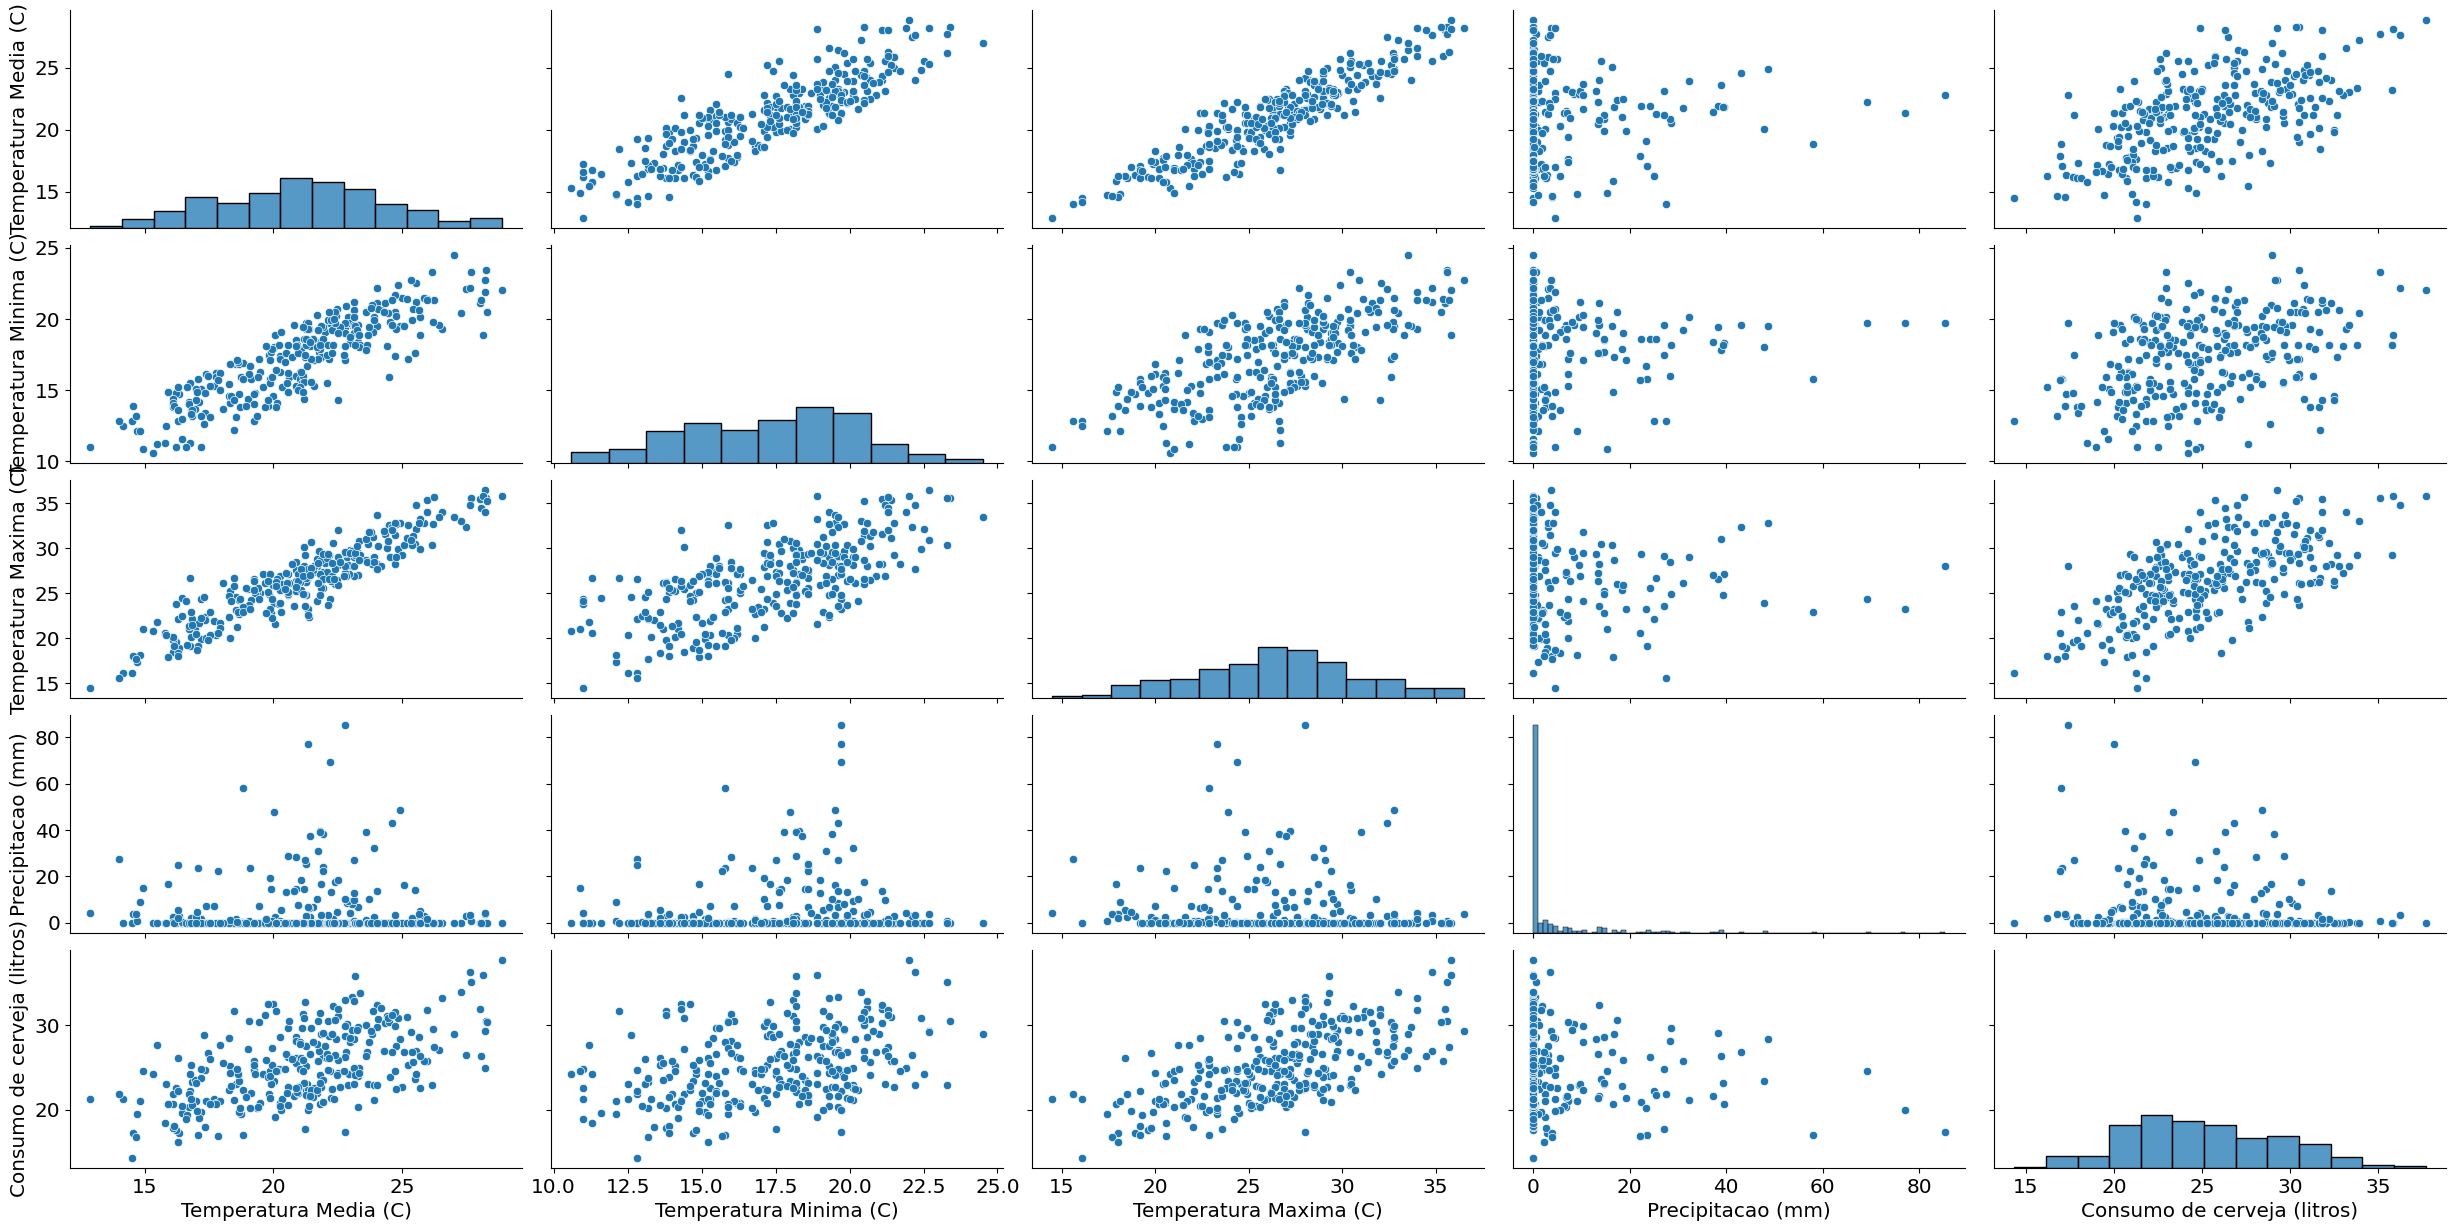

In [120]:
sns.pairplot(train_data, aspect=2)


**Observação 2:**  Perceba que, em relação ao consumo de cerveja, há relações lineares entre as Temperaturas Média, Mínima e Máxima. Em relação a Precipitacao (mm) podemos considerar que quanto menor precipitação, maior a frequência de consumo de cerveja e maior também os valores desse consumo. Podemos notar também que o consumo de cerveja descreve uma distribuição aproximadamente normal com uma média de ~25 litros

### 1.4 Correlation Matrix

In [122]:
# Fazendo o plot da matriz de correlação entre as variáveis contínuas

correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

ValueError: could not convert string to float: '2015-07-31'

In [116]:
train_data.corr()

ValueError: could not convert string to float: '2015-07-31'

## 2. Dependent Variable (y) vs Independent Variables

### `pairplot`

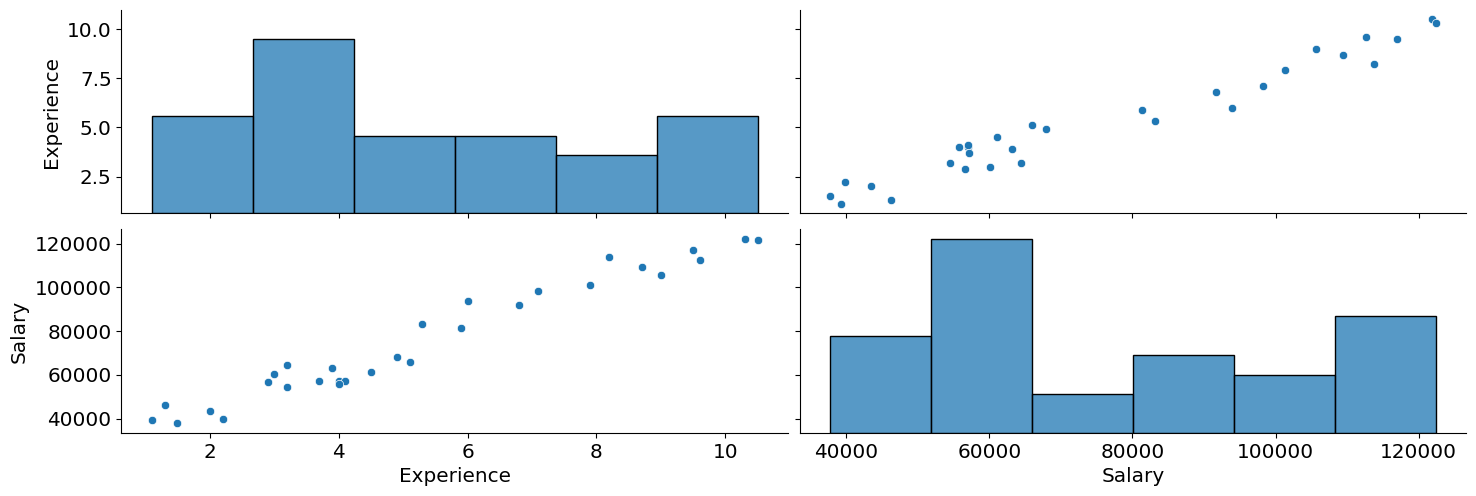

In [ ]:
sns.pairplot(df, aspect=3)

### `jointplot`

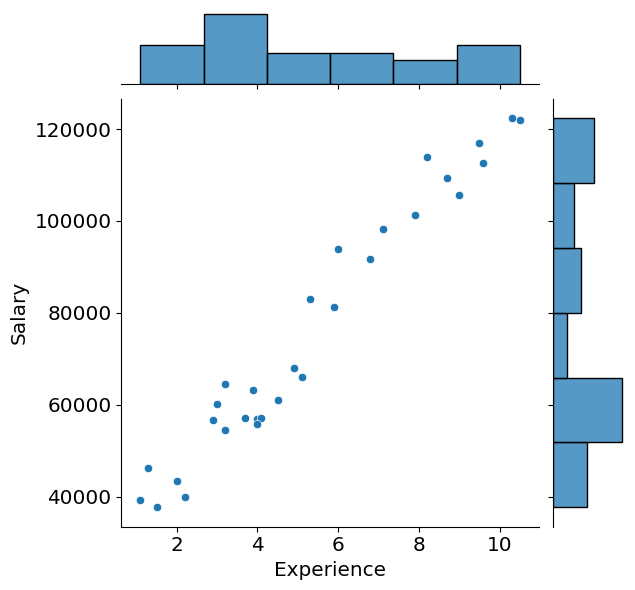

In [ ]:
sns.jointplot(data=df, x='Experience', y='Salary')

### `jointplot` with the estimated regression line

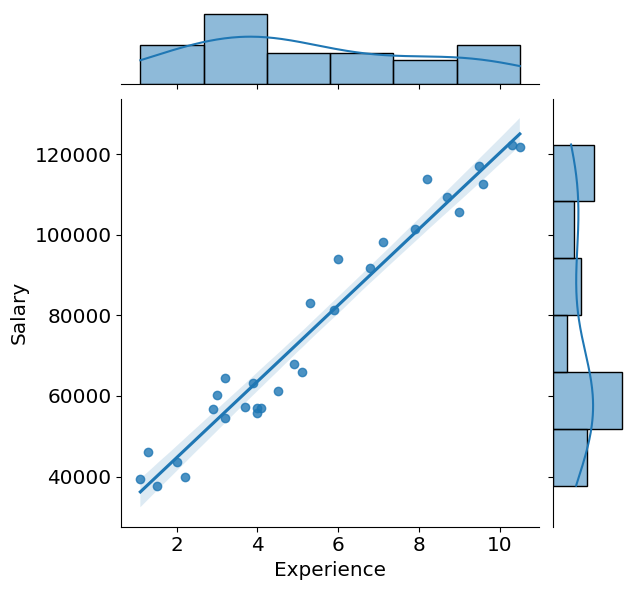

In [ ]:
sns.jointplot(data=df, x='Experience', y='Salary', kind='reg')

### `lmplot`
Plots the regression line between two variables together with their respective dispersions.

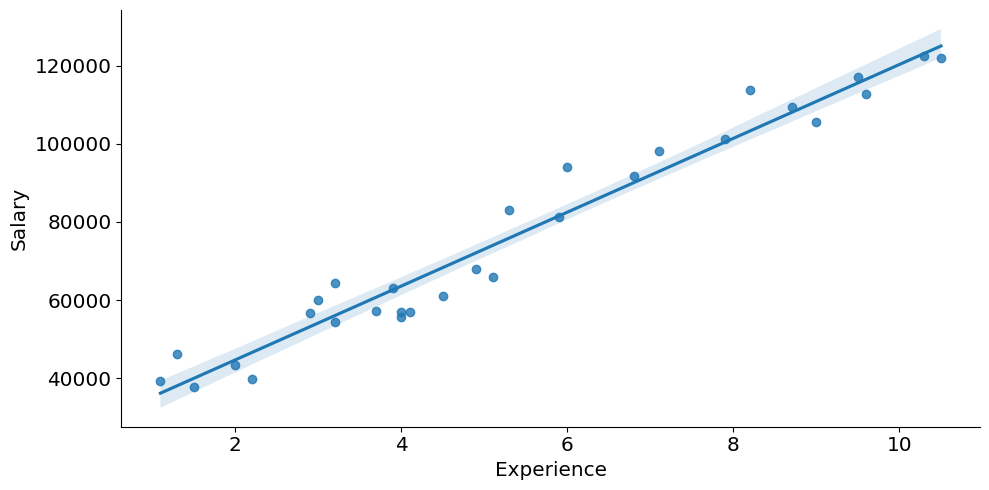

In [ ]:
sns.lmplot(data=df, x='Experience', y='Salary', aspect=2)

## 🤖 3. Estimating a Linear Regressor

### 3.1. Extracting the independent and dependent variables

In [ ]:
df

,Experience,Salary
0,8.7,109431.0
1,5.3,83088.0
2,9.0,105582.0
3,6.0,93940.0
4,9.6,112635.0
5,2.9,56642.0
6,4.0,56957.0
7,3.9,63218.0
8,3.2,54445.0
9,3.2,64445.0


In [ ]:
df['Experience'].to_frame()

,Experience
0,8.7
1,5.3
2,9.0
3,6.0
4,9.6
5,2.9
6,4.0
7,3.9
8,3.2
9,3.2


In [ ]:
# feature matrix
X = df[['Experience']]
X

,Experience
0,8.7
1,5.3
2,9.0
3,6.0
4,9.6
5,2.9
6,4.0
7,3.9
8,3.2
9,3.2


In [ ]:
# target label ==> Salary
y = df['Salary']
y

0     109431.0
1      83088.0
2     105582.0
3      93940.0
4     112635.0
5      56642.0
6      56957.0
7      63218.0
8      54445.0
9      64445.0
10     39891.0
11     81363.0
12     57081.0
13     60150.0
14     66029.0
15    121872.0
16     37731.0
17     39343.0
18     43525.0
19    113812.0
20     57189.0
21    116969.0
22     46205.0
23     55794.0
24     91738.0
25     67938.0
26     61111.0
27    122391.0
28     98273.0
29    101302.0
Name: Salary, dtype: float64

#### Creating a DataFrame to store the independent/explanatory variables: Feature Matrix (X)
NB: we could use a numpy array instead.

In [ ]:
# convert a DataFrame to a numpy array
X.values

array([[ 8.7],
       [ 5.3],
       [ 9. ],
       [ 6. ],
       [ 9.6],
       [ 2.9],
       [ 4. ],
       [ 3.9],
       [ 3.2],
       [ 3.2],
       [ 2.2],
       [ 5.9],
       [ 4.1],
       [ 3. ],
       [ 5.1],
       [10.5],
       [ 1.5],
       [ 1.1],
       [ 2. ],
       [ 8.2],
       [ 3.7],
       [ 9.5],
       [ 1.3],
       [ 4. ],
       [ 6.8],
       [ 4.9],
       [ 4.5],
       [10.3],
       [ 7.1],
       [ 7.9]])

In [ ]:
X_npy = X.values
X_npy

array([[ 8.7],
       [ 5.3],
       [ 9. ],
       [ 6. ],
       [ 9.6],
       [ 2.9],
       [ 4. ],
       [ 3.9],
       [ 3.2],
       [ 3.2],
       [ 2.2],
       [ 5.9],
       [ 4.1],
       [ 3. ],
       [ 5.1],
       [10.5],
       [ 1.5],
       [ 1.1],
       [ 2. ],
       [ 8.2],
       [ 3.7],
       [ 9.5],
       [ 1.3],
       [ 4. ],
       [ 6.8],
       [ 4.9],
       [ 4.5],
       [10.3],
       [ 7.1],
       [ 7.9]])

#### Creating a Series to store the dependent variable (y)

In [ ]:
# convert a Series to a numpy array
y_npy = y.values
y_npy

array([109431.,  83088., 105582.,  93940., 112635.,  56642.,  56957.,
        63218.,  54445.,  64445.,  39891.,  81363.,  57081.,  60150.,
        66029., 121872.,  37731.,  39343.,  43525., 113812.,  57189.,
       116969.,  46205.,  55794.,  91738.,  67938.,  61111., 122391.,
        98273., 101302.])

### 3.2 Splitting the dataset into Training Set and Test Set
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'type(X_train) = {type(X_train)}')
print(f'type(X_test) = {type(X_test)}')

type(X_train) = <class 'pandas.core.frame.DataFrame'>
type(X_test) = <class 'pandas.core.frame.DataFrame'>


In [ ]:
print(f'type(y_train) = {type(y_train)}')
print(f'type(y_test) = {type(y_test)}')

type(y_train) = <class 'pandas.core.series.Series'>
type(y_test) = <class 'pandas.core.series.Series'>


In [ ]:
# now using numpy arrays
X_train_npy, X_test_npy, y_train_npy, y_test_npy  = train_test_split(X_npy, y_npy, test_size=0.2, random_state=42)

In [ ]:
print(f'type(X_train_npy) = {type(X_train_npy)}')
print(f'type(X_test_npy) = {type(X_test_npy)}')

type(X_train_npy) = <class 'numpy.ndarray'>
type(X_test_npy) = <class 'numpy.ndarray'>


In [ ]:
print(f'type(y_train_npy) = {type(y_train_npy)}')
print(f'type(y_test_npy) = {type(y_test_npy)}')

type(y_train_npy) = <class 'numpy.ndarray'>
type(y_test_npy) = <class 'numpy.ndarray'>


#### Checking training and test set sizes

In [ ]:
print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')

X_train.shape = (24, 1)
y_train.shape = (24,)


In [ ]:
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_test.shape = (6, 1)
y_test.shape = (6,)


In [ ]:
X_train.head()

,Experience
28,7.1
24,6.8
12,4.1
0,8.7
4,9.6


In [ ]:
y_train.head()

28     98273.0
24     91738.0
12     57081.0
0     109431.0
4     112635.0
Name: Salary, dtype: float64

In [ ]:
df.tail()

,Experience,Salary
25,4.9,67938.0
26,4.5,61111.0
27,10.3,122391.0
28,7.1,98273.0
29,7.9,101302.0


### 3.3. Training the Simple Linear Regression Model with the Training Set
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
# fit ==> ajustar, e, no contexto de ML, significa "train"
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# theta_0
reg.intercept_

24568.367141463837

In [ ]:
# theta_1
reg.coef_

array([9694.40746345])

A partir do conjunto de treinamento estabelecido, nossa reta é então: <br/>
**h(x) = 24568.367141463837 + 9694.4074634 * x**

The averaged predicted annual salary of an **inexperienced (zero years of experience)** employee is \\$24,568.36 (intercept $ \theta_0 $).

**For each additional year of experience**, the employee's annual salary increases by \\$9,694.4 (slope of the line - $ \theta_1 $).

## 3.4 Coefficient of determination (R²) of the linear model estimated with the Training Set

The ***coefficient of determination (R²)*** measures the _proportion of total variability_ of the _$y$-value_ (**dependent variable**) that is accounted for by _another variable_ (**independent variable $x$**).

In our case, it tells _"how much of the variation in the **salary ($y$)** can be explained by the **employee's experience ($x$)**."_

In simple words, the ***coefficient of determination (R²)*** tells you _how well the regression line fits the training data_. <br/>
It is a value (generally) between 0 and 1.

Eg **R² = 0.8234** means that the _linear model_ explains 82.34% of the _variance_ of the **dependent variable** from the regressors (**independent variables**) included in that _linear model_.

Broadly speaking:

| **Coefficient of determination (R²)** | **Interpretation**                            |
|---------------------------------------|-----------------------------------------------|
| 0                                     | The model **does not** predict the outcome.   |
| Between 0 and 1                       | The model **partially** predicts the outcome. |
| 1                                     | The model **perfectly** predicts the outcome. |

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^{m}(y^{(i)}-\bar{y})^2}$$

<br/>

<table align="left" class='dashed-box'>
<tr>
    <td>💡</td>
    <td>In general, an <b>R² value</b> of <b><i>0.7 or higher</i></b> is often considered a <i>strong relationship</i> between <i>two variables</i>.</td>
</tr>
</table>
    
<table align="left" class='dashed-box'>
<tr>
    <td>⚠️</td>
    <td><b>R²</b> is typically used <i>only</i> for the <b><i>training data</i></b> since the <i>regression model</i> was trained from it.<br/> Therefore, <b>R²</b> value obtained on the <b><i>training data</i></b> <i>may not</i> be an accurate reflection of how well the model will perform on <b><i>unseen data (testing data)</i></b>.</td>
</tr>
</table>

<table align="left" class='dashed-box'>
<tr>
    <td>💡</td>
    <td>To evaluate <b><i>unseen data (testing data)</i></b>, it is recommended to other metrics such as the <i>Root Mean Squared Error (RMSE)</i> or the <i>Mean Absolute Error (MAE)</i>.</td>
</tr>
</table>

#### Correlation Coefficient vs Coefficient of Determination

The **Correlation Coefficient** is the _squared root_ of the ***Coefficient of Determination (R²)***. <br/>
In other words:
- the **Correlation Coefficient** tells us about the _strength_ and _direction_ of the ***linear relationship*** between _two variables_
- ***R²*** tells us about the _proportion of the variation_ in the ***dependent variable*** that is _explained_ by the ***independent variable(s)*** in a _regression model_.

In [ ]:
print(f'R² = {reg.score(X_train, y_train)}')

R² = 0.949016663016664


In [ ]:
from sklearn.metrics import r2_score

# prediction of the training examples
y_train_pred = reg.predict(X_train)

# y_train ==> ground-truth
R2_sklearn = r2_score(y_train, y_train_pred)

print(f'R² = {R2_sklearn}')

R² = 0.949016663016664


## 4. Predicting Salaries for Test Samples

### 4.1. Prediction

In [ ]:
X_test

,Experience
27,10.3
15,10.5
23,4.0
17,1.1
8,3.2
9,3.2


In [ ]:
y_test

27    122391.0
15    121872.0
23     55794.0
17     39343.0
8      54445.0
9      64445.0
Name: Salary, dtype: float64

In [ ]:
# prediction for the test set
y_test_pred = reg.predict(X_test)
y_test_pred

array([124420.76401503, 126359.64550772,  63345.99699528,  35232.21535126,
        55590.47102451,  55590.47102451])

In [ ]:
y_test_pred.round(2)

array([124420.76, 126359.65,  63346.  ,  35232.22,  55590.47,  55590.47])

In [ ]:
results = pd.DataFrame({
    'Experience (Years)': X_test['Experience'],
    'Salary (Prediction)': y_test_pred.round(2),
    'Salary (True)': y_test.round(2),
    'Erro (Residual)': (y_test - y_test_pred).round(2),
    'Erro (Absolute)': abs(y_test - y_test_pred).round(2),
})

results

,Experience (Years),Salary (Prediction),Salary (True),Erro (Residual),Erro (Absolute)
27,10.3,124420.76,122391.0,-2029.76,2029.76
15,10.5,126359.65,121872.0,-4487.65,4487.65
23,4.0,63346.00,55794.0,-7552.00,7552.00
17,1.1,35232.22,39343.0,4110.78,4110.78
8,3.2,55590.47,54445.0,-1145.47,1145.47
9,3.2,55590.47,64445.0,8854.53,8854.53


The **residuals** inform how far the predictions are from the linear model.

In [ ]:
results.describe()

,Experience (Years),Salary (Prediction),Salary (True),Erro (Residual),Erro (Absolute)
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,5.383333,76756.595000,76381.666667,-374.928333,4696.698333
std,4.003707,38813.562482,36347.339334,5950.823807,3018.313967
min,1.100000,35232.220000,39343.000000,-7552.000000,1145.470000
25%,3.200000,55590.470000,54782.250000,-3873.177500,2550.015000
50%,3.600000,59468.235000,60119.500000,-1587.615000,4299.215000
75%,8.725000,109152.070000,107515.250000,2796.717500,6785.912500
max,10.500000,126359.650000,122391.000000,8854.530000,8854.530000


### 4.2. Visualizing the samples with the Linear Models

In [ ]:
regression_line_x = X['Experience']
regression_line_y = reg.predict(X)
regression_line_y

array([108909.7120735 ,  75948.72669776, 111818.03431254,  82734.81192218,
       117634.67879061,  52682.14878548,  63345.99699528,  62376.55624893,
        55590.47102451,  55590.47102451,  45896.06356106,  81765.37117584,
        64315.43774162,  53651.58953182,  74009.84520507, 126359.64550772,
        39109.97833664,  35232.21535126,  43957.18206837, 104062.50834178,
        60437.67475624, 116665.23804427,  37171.09684395,  63345.99699528,
        90490.33789294,  72070.96371238,  68193.200727  , 124420.76401503,
        93398.66013198, 101154.18610274])

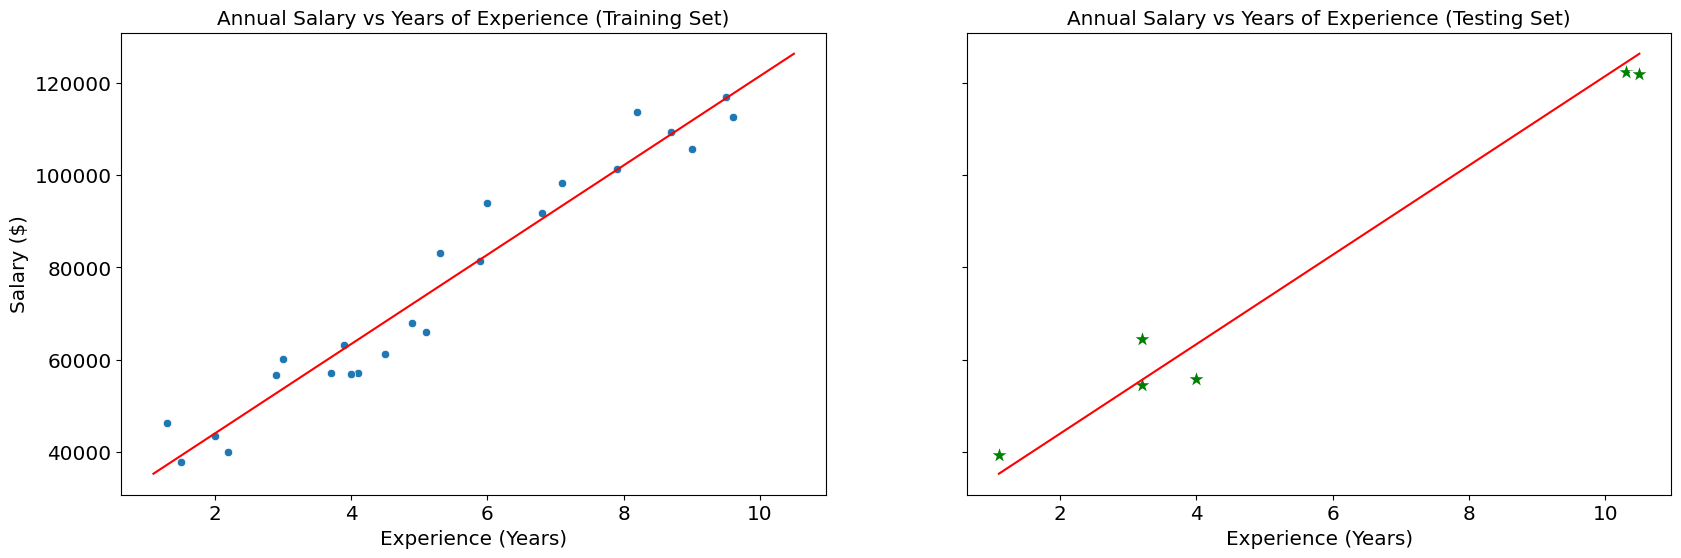

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

regression_line_x = X['Experience']
regression_line_y = reg.predict(X)

sns.scatterplot(x=X_train['Experience'], y=y_train, ax=axs[0])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[0])
axs[0].set_title('Annual Salary vs Years of Experience (Training Set)')
axs[0].set_xlabel('Experience (Years)')
axs[0].set_ylabel('Salary ($)')

sns.scatterplot(x=X_test['Experience'], y=y_test, color="green", marker='*', s=200, ax=axs[1])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[1])
axs[1].set_title('Annual Salary vs Years of Experience (Testing Set)')
axs[1].set_xlabel('Experience (Years)')
axs[1].set_ylabel('Salary ($)')

display()
#teste

In [ ]:
X_labeled = X.copy()
X_labeled['Label'] = 'Train'
X_labeled
X_labeled.loc[X_test.index, 'Label'] = 'Test'
X_labeled

,Experience,Label
0,8.7,Train
1,5.3,Train
2,9.0,Train
3,6.0,Train
4,9.6,Train
5,2.9,Train
6,4.0,Train
7,3.9,Train
8,3.2,Test
9,3.2,Test


Text(0, 0.5, 'Salary ($)')

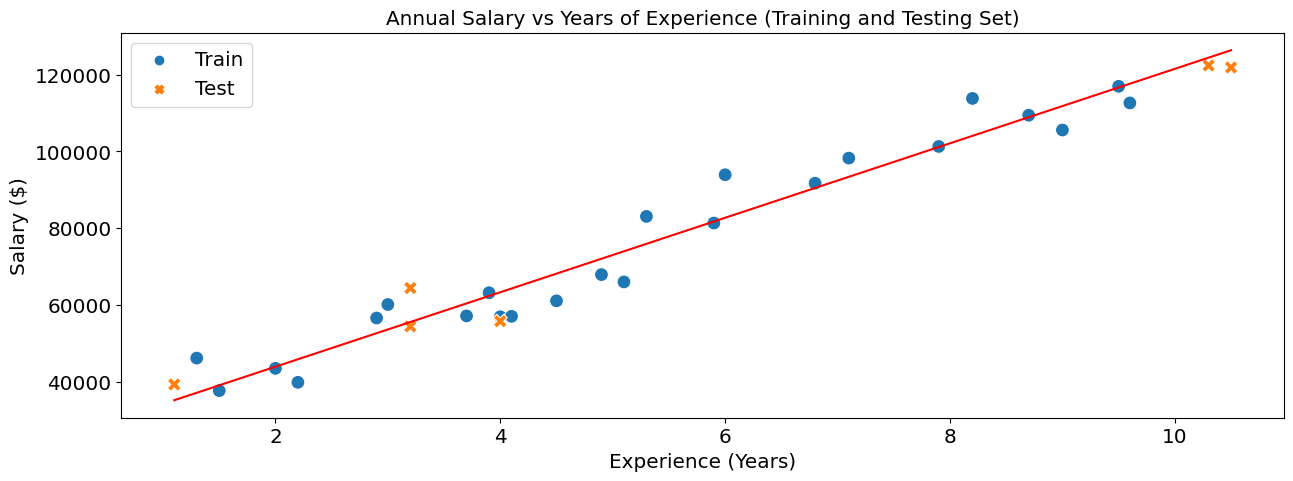

In [ ]:
sns.scatterplot(data=X_labeled, x='Experience', y=y, hue='Label', style='Label', s=100)
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")
plt.title('Annual Salary vs Years of Experience (Training and Testing Set)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')

## 5. Computing Evaluation Metrics

How much do the predictions obtained differ from the actual data?

### Mean Absolute Error (MAE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

$$ MAE = \frac{1}{m}\sum_{i=1}^{m}|y^{(i)} - \hat{y}^{(i)}| $$

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
MAE = mean_absolute_error(y_test, y_test_pred)
MAE

4696.698527793701

### Mean Squared Error (MSE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)} - \hat{y}^{(i)})^2 $$

Since the **errors** are squared before computing the _mean_, MSE weights **large errors** more than the MAE.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_test, y_test_pred)
MSE

29650816.74172468

## Root Mean Squared Error (RMSE)
Square root of the MSE. <br/>
This is the metric commonly used to compare regression models.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [ ]:
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
RMSE

5445.256352250524

# Exercise

Consider the dataset below that contains **heights** (in inches/inches) and **weights** (in pounds/lbs) of fake people. <br/>
https://www.kaggle.com/mustafaali96/weight-height

Perform the following tasks:
- Split the dataset into 80% for training and 20% for testing
- Compute the correlation between the training set variables
- Train a regression model considerint **height** as the independent variable and **weight** as the dependent one
   + Compute the model determination coefficient
   + Plot a scatterplot of the two variables containing the regression model (line)
- Predict the test set
   + Plot a scatterplot of the two variables containing the regression model (line)
   + Compute error metrics for regression